# Homework 5 Solutions

# Problem 1 - Decision Boundaries in MLP Layers

**Suppose you want to create this mask with a two-hidden layer MLP with sigmoid units (threshold non-linearity). Assume that black pixels are 0 and white pixels are 1 (2 class problem).**

<div><img src="mask.png", width="300"><!div>

**Answer the following questions:**

1. **What is the smallest number of hidden units/neurons you will need in each layer?**

2. **Explain their role in creating the mask.**

3. **Can you achieve the same goal with a *single hidden layer network*? Why or why not?**

**Answer:**

1 & 2. Without assuming that there are shared linear boundaries for different objects (left vertical side of the mounth with right vertical side of the left eye), we will need 15 neurons for the first hidden layers. There will correspond to the linear boundaries outlining each of the four objects in the image, 4 boundaries for left eye, 4 boundaries for right eye, 3 boundaries for nose and 4 boundaries for mounth.

The second hidden layer would combine the information of these boundaries to form closed shapes. And so, we will need 4 neurons in the second hidden layer. 

3. According to the Universal Approximation Theorem, a multi-layer perceptron with a single layer can approximate any function provided that it contains a sufficient amount of neurons in the hidden layer. 

# Problem 2 - Backpropagation

**Consider the following network: 1 input layer, 1 hidden layer and 1 output layer, each layer with 2 neurons.**

<div><img src="network.png", width="700"><!div>
    
**All weights are initialized to the values shown (and there are no biases for simplicity). Consider the data point $x=[1,1]^T$ with desired output vector $d=[1,0]^T$. Complete one iteration of backpropagation by hand assuming a learning rate of $\eta=0.1$.**

**What would all the weight values be after one backpropagation iteration? Show your work.**

**Use the sigmoid activation function: $\phi(x) = \frac{1}{1 + e^{-x}}$. Note that $\frac{d\phi(x)}{dx}=\phi'(x) = \phi(x)(1-\phi(x))$.**

**Solutions:** Check the file "HW5-Problem2 solution.pdf".

# Problem 3 - Batch vs Online Learning

**In this problem, you will be working with the [Optical recognition of handwritten digits dataset](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits).

**The Digits data set contains $8\times 8$ images of digits (class labels 0, 1, 2, 3, 4, 5, 6, 7, 8 and 9). This data set has 60,000 images for training and 10,000 images for testing. Each image is a 8-bit grayscale image and so the intensity values per pixel range from 0-255.**

**The following code cell loads the Digits data set.**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_digits

In [3]:
X, y = load_digits(return_X_y = True)

X.shape, y.shape, np.unique(y)

((1797, 64), (1797,), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

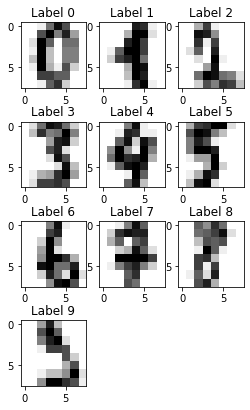

In [4]:
fig = plt.figure(figsize=(4,7))
for i in range(10):
    ax = fig.add_subplot(4,3,i+1)
    ax.imshow(X[np.where(y==i)[0][1],:].reshape((8,8)), cmap='binary')
    plt.title('Label '+str(i))

In this problem you will be comparing the performance between (1) online and batch learning and (2) using different optimization algorithms (stochastic gradient descent or SGD, SGD with momentum, ADAM, etc.).

The ```MLPClassifier``` parameters you will need to consider for this question are:

* ```hidden_layer_sizes```, ```solver```, ```alpha```, ```batch_size```, ```learning_rate```, ```learning_rate_init```, ```momentum```, ```nesterovs_momentum``` and ```random_state```.

Answer the following questions:

1. **Online vs Batch learning** 

Create a fixed network architecture (for example, single hidden layer with 10 neurons), with a fixed learning rate (e.g. 0.001), consider 0 momentum and no Nesterov's momentum. I recommend you to fix the ```random_state``` to some seed so you can compare the results between runs.

Using this setup, experiment with different batch sizes (batch = 1 is the same as doing online learning). Plot the learning curves for all models (single plot) and evaluate the accuracy results in test set for all cases. Provide a discussion about differences and advantages of online vs batch learning.

(To plot learning curves, there's a method associated with ```sklearn``` functions called ```loss_curve_```. There is also another function called ```learning_curve``` from the ```model_selection``` module.)

2. **Optimization Algorithms**

Create a similar setup as in the previous step where now you will experiment with different learning algorithms, in particular: SGD with momentum, SGD with Nesterov's momentum and ADAM.

Include learning curves for all models (single plot) and comment on the results. Which one worked better? Using what we learned in class, does the result match your expectation?

3. **Comparison of Test Performance**

Compare the test set performance for all learning strategies you have experimented with. Provide an overall discussion that addresses your earlier comments on parts 2 and 3 and relate them to how successful each strategy is generalization for test set.

Provide any additional insightful comments on any particular of the network that would result in a significant impact in the test performance.

In [5]:
#Additional needed imports/declarations
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import learning_curve

In [6]:
#Initial Setup
rng_seed = 1234

#normalize the data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

#split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=rng_seed)

## Part 1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

Text(0.5, 1.0, 'Learning Curves')

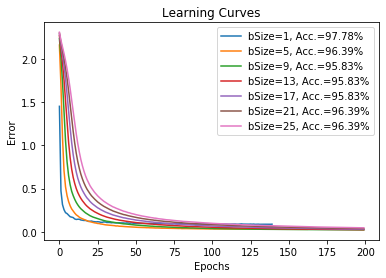

In [12]:
hdn_lyr_sz = (25, 15)
alpha = 0.001
rho = 0.01
mo = 0
solver = 'sgd'

plt.figure()
acc = []
for batch_size in range(1,26,4):
  mlp = MLPClassifier(hidden_layer_sizes=hdn_lyr_sz, solver=solver,
                      alpha=alpha, batch_size=batch_size,
                      learning_rate_init=rho, random_state=rng_seed, 
                      momentum=mo, nesterovs_momentum=False)
  
  mlp.fit(X_train, y_train)
  est = mlp.predict(X_test)
  acc.append(np.sum(est == y_test) / len(y_test) * 100)
  plt.plot(mlp.loss_curve_, label='bSize=%d, Acc.=%2.2f%%' % (batch_size, acc[-1]))
  
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Learning Curves')

## Discussion
From the learning curves shown above we can see that as the batch size increased the speed of learning decreased. The online test, bSize=1, achieved the highest test set accuracy but only marginally but also had the highest final error according to the learning curves. 

Online learning updates the network once per every data point while the batch methods only update the network after a number of samples have been seen, thus the online method updates the network more often leading to faster learning, at least in this example. Batch optimization has a slower learning curve but in the end was able to find a more optimal solution when only considering the training data. 

## Part 2

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0.5, 1.0, 'Learning Curves')

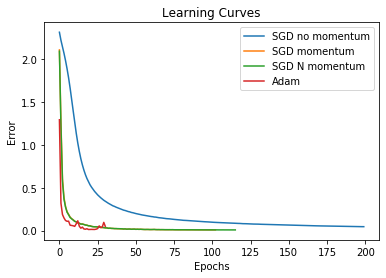

In [8]:
hdn_lyr_sz = (25, 15)
alpha = 0.001
rho = 0.01
batch_size = 25
mo = (0, .9, .9, 0)
n_mo = (False, False, True, False)
solver = ('sgd', 'sgd', 'sgd', 'adam')
labels = ('SGD no momentum', 'SGD momentum', 'SGD N momentum', 'Adam')

plt.figure()
for i in range(4):
  mlp = MLPClassifier(hidden_layer_sizes=hdn_lyr_sz, solver=solver[i],
                      alpha=alpha, batch_size=batch_size,
                      learning_rate_init=rho, random_state=rng_seed, 
                      momentum=mo[i], nesterovs_momentum=n_mo[i])
  
  mlp.fit(X_train, y_train)
  plt.plot(mlp.loss_curve_, label=labels[i])
  
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Learning Curves')

### Discussion
From the above plot we can see that Adam was the fastest of the four optimization techniques tested. Standard SGD was by far the slowest, which follows with what was shown in class as no speed-ups have been implemented. SGD with momentum with and without Nesterov's momentum performs approximately the same and both converged to a steady state long before the 200 epoch cutoff. These results are expected as the momentum terms greatly increased the speed of convergence over standard SGD, while Adam with it's adaptive learning rate converged slightly quicker still.

## Part 3

In [15]:
hdn_lyr_sz = (25, 15)
alpha = 0.001
rho = 0.01
batch_size = (1, 5, 10, 15, 20, 25, 30)
mo = (0, .9, .9, 0)
n_mo = (False, False, True, False)
solver = ('sgd', 'sgd', 'sgd', 'adam')
labels = ('SGD no momentum', 'SGD momentum', 'SGD N momentum', 'Adam')

Results = np.zeros((4, 7))
for i in range(4):
  for j in range(len(batch_size)):
    mlp = MLPClassifier(hidden_layer_sizes=hdn_lyr_sz, solver=solver[i],
                        alpha=alpha, batch_size=batch_size[j],
                        learning_rate_init=rho, random_state=rng_seed, 
                        momentum=mo[i], nesterovs_momentum=n_mo[i])
    
    mlp.fit(X_train, y_train)
    est_labels = mlp.predict(X_test)
    Results[i, j] = np.sum(est_labels == y_test) / len(y_test)
  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

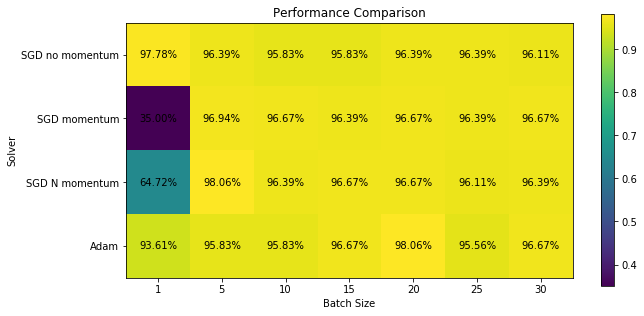

In [16]:
plt.figure(figsize=(10,5))
plt.imshow(Results)
plt.xlabel('Batch Size')
plt.xticks(range(len(batch_size)), batch_size)
plt.ylabel('Solver')
plt.yticks(range(len(solver)), labels)
plt.title('Performance Comparison')
plt.colorbar()


for i in range(4):
  for j in range(7):
    s = '%2.2f%%' % (Results[i,j]*100)
    plt.text(j,i,s,{'horizontalalignment': 'center', 'verticalalignment': 'center'})

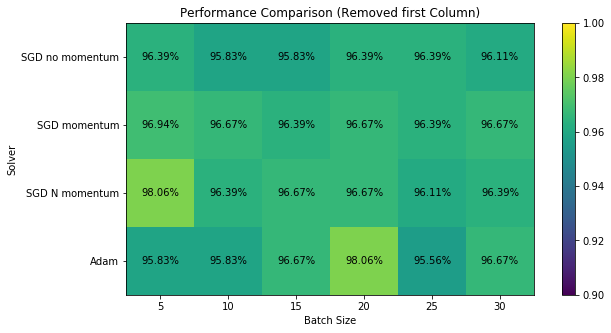

In [24]:
plt.figure(figsize=(10,5))
plt.imshow(Results[:,1:7])
plt.xlabel('Batch Size')
plt.xticks(range(len(batch_size[1:7])), batch_size[1:7])
plt.ylabel('Solver')
plt.yticks(range(len(solver)), labels)
plt.title('Performance Comparison (Removed first Column)')
plt.colorbar()
plt.clim([.9, 1])


for i in range(4):
  for j in range(1,7):
    s = '%2.2f%%' % (Results[i,j]*100)
    plt.text(j-1,i,s,{'horizontalalignment': 'center', 'verticalalignment': 'center'})

### Discussion
When looking at the overall results we see that the momentum terms had a very negative affect on the performance when used in the online training scenario. This is due to the random nature of the updates when doing a truly stochastic update which causes the momentum term to fight the gradient term leading to very slow learning. Outside of these two cases all methods tested performed very similarly with less than a 2% diference in accuracy. 